<a href="https://colab.research.google.com/github/chenmargalit/State-of-the-nation/blob/master/State_of_the_nation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is not a good dataset. In some way I like working with bad datasets for educational purposes because in the real world you don't fully choose your data, sometimes the best you have is just not too good and you have to make the best of it.

### Prepare the data

In [0]:
# Those are pretty generic imports many projects need, the rest I'll import as we go so its easir to understand where do they fit in

import numpy as np
import pandas as pd
import os
import pickle

In [0]:
mkdir pres

mkdir: cannot create directory ‘pres’: File exists


In [0]:
!ls

pres  sample_data  yelp_review_polarity_csv  yelp_review_polarity_csv.tgz


In [71]:
cd pres

[Errno 2] No such file or directory: 'pres'
/content/pres


In [132]:
# Read the files and put into a list

fileList = os.listdir()

data = []
path = './'
files = [f for f in os.listdir('./') if os.path.isfile(f)]
for f in files:
    with open(f,'r') as myfile:
        data.append(myfile.read())
df = pd.DataFrame(data)

data[0][:150]

'Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of\nthe United States, and my fellow Americans:\n\nLess than 1 year has passed since I first stood at this podium, in this\nmajestic ch'

In [0]:
# Names by order
names = ['Adams', 'Bush', 'Clinton', 'Eisenhower', 'Kennedy', 'Lincoln', 'Obama', 'Reagan', 'Roosevelt', 'Trump', 'Washington']

In [134]:
# Easier to work with in a DF
data = pd.DataFrame(data)
data.index = names
data.columns = ['speech']
data.head()

,speech
Adams,"Mr. Speaker, Mr. Vice President, Members of Co..."
Bush,"Mr. Vice President, Mr. Speaker, Members of th..."
Clinton,Fellow Citizens of the Senate and of the House...
Eisenhower,To the Congress:\n\nIn considering the State o...
Kennedy,To the Congress of the United States:\n\nOnce ...


In [135]:
data_df = data.copy()
data_df.head()

,speech
Adams,"Mr. Speaker, Mr. Vice President, Members of Co..."
Bush,"Mr. Vice President, Mr. Speaker, Members of th..."
Clinton,Fellow Citizens of the Senate and of the House...
Eisenhower,To the Congress:\n\nIn considering the State o...
Kennedy,To the Congress of the United States:\n\nOnce ...


In [0]:
data_df.to_pickle('corpus.pkl')

As the text consists of real presidental speeches, it's pretty clean (no typos, no spelling mistakes). For educational purposes, I will still use some cleaning that shouldn't harm the analysis. There is a balance to consider in NLP as on the one hand data does not come clean and ready, we often need to modify it to make it more comfortable to work with, more optimised (performance wise) etc. On the other hand, changing the data might very well lead to loosing important information. For example here I will uncapitalize anyting capiliazed. If I would be doing a deep neural network analysis this would maybe not make sense as capialized words might have a different meaning (e.g - this is happening now vs this is happenning NOW). As this is a part of a tool for internal use, it will fit my needs, but this remains a balance to consider

### Data cleaning

In [0]:
# Super lightweight data cleaning as to not mess/change the data too much

import re
import string

def clean_text(text):
  text = text.lower()
  text = re.sub('title', '', text)
  # Text is full with 3 digits numbers (011, 039, 076 etc) which after going through the data, I find unhelpful to the analysis and so I decied to take it out.
  # this regular expression (e.g re) will remove every 2 (or more) digits number (10 and larger). This is quite risky normally, but going through the data,
  # and considering the nature of analysis, I think this is the right decision
  text = re.sub(r'\d\d+', '', text)
  return text

first_clean = lambda x: clean_text(x)

In [0]:
# Apply the cleaning
data_clean = pd.DataFrame(data.speech.apply(first_clean))

CountVectorizer will generate a matrix with every word in the DF and the count of times it was used by each of the speakers

In [139]:
# Create a count vectorizer containing summation of each word for each president. Here we can see 

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.speech)
data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_dtm.index = data_clean.index

data_dtm.head()

,1st,2d,2nd,3d,3rd,4th,5th,6th,7th,aaron,abandon,abandonment,abide,ability,able,ablest,abnormal,aboard,abolished,abolishing,abolition,abortion,abound,abreast,abroad,absence,absolute,absolutely,absorbed,absorption,abstract,abundance,abundant,abuse,abusive,academic,academy,accelerate,accelerating,acceleration,...,wound,wounded,wounds,wreaking,wreaks,wreck,wrest,wright,write,written,wrong,wrongs,wto,wyoming,yard,yards,year,yearly,yearn,yearning,years,yellow,yemen,yes,yesterday,yield,yielded,yielding,yields,york,yorktown,young,youth,youthful,yugoslavia,zealand,zealous,zimbabwe,zone,zones
Adams,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,19,0,0,2,10,0,0,0,0,0,0,0,0,1,1,4,1,0,0,0,0,0,0,0
Bush,0,0,0,0,0,0,1,0,0,0,1,1,0,4,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,20,0,0,1,11,0,0,0,0,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0
Clinton,5,1,1,1,2,1,2,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,2,0,0,0,0,0,0,1,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,22,1,0,0,10,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
Eisenhower,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,17,0,0,0,6,1,0,0,1,0,0,0,0,0,0,3,0,0,1,0,0,0,1,0
Kennedy,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2,0,0,0,1,0,0,0,0,1,5,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,12,0,1,0,26,0,0,0,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0


In [0]:
data_dtm.to_pickle("dtm.pkl")

In [0]:
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [142]:
# Transposed version of the file, will be easier to work with in the up coming operations
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Adams,Bush,Clinton,Eisenhower,Kennedy,Lincoln,Obama,Reagan,Roosevelt,Trump,Washington
1st,0,0,5,0,0,0,5,0,2,0,0
2d,0,0,1,0,0,0,0,0,0,0,0
2nd,0,0,1,0,0,0,0,0,0,0,0
3d,0,0,1,0,0,0,0,0,0,0,0
3rd,0,0,2,0,0,0,0,0,0,0,1


### First analysis

In [0]:
# Top 30 used word for each president

top_dict = {}
for c in data.columns:
  top = data[c].sort_values(ascending=False).head(30)
  top_dict[c] = list(zip(top.index, top.values))

In [0]:
# Top 10

top_10 = {}
for c in data.columns:
  top = data[c].sort_values(ascending=False).head(10)
  top_10[c] = list(zip(top.index, top.values))

In [145]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Adams,Bush,Clinton,Eisenhower,Kennedy,Lincoln,Obama,Reagan,Roosevelt,Trump,Washington
1st,0,0,5,0,0,0,5,0,2,0,0
2d,0,0,1,0,0,0,0,0,0,0,0
2nd,0,0,1,0,0,0,0,0,0,0,0
3d,0,0,1,0,0,0,0,0,0,0,0
3rd,0,0,2,0,0,0,0,0,0,0,1


In [146]:
# Top 14 words for every president, same idea as the top_dict, different vizualization

for pres, value in top_dict.items():
  print(pres)
  print(', '.join([word for word, count in value[0:14]]))
  print('---')

Adams
american, america, people, americans, tonight, new, year, country, tax, congress, great, work, home, world
---
Bush
world, nations, year, free, tax, defense, new, peace, alliance, help, need, nuclear, freedom, billion
---
Clinton
states, congress, great, united, year, union, nation, revenue, state, country, public, britain, duties, commerce
---
Eisenhower
war, peace, forces, men, new, army, production, japanese, world, great, year, nurses, people, europe
---
Kennedy
new, federal, years, program, american, world, government, million, peace, administration, programs, states, national, united
---
Lincoln
america, world, people, ve, work, years, year, make, new, american, just, change, economy, americans
---
Obama
states, year, war, congress, government, national, great, united, new, people, union, public, treasury, country
---
Reagan
new, america, make, children, years, work, year, americans, help, people, care, american, tax, let
---
Roosevelt
let, america, freedom, government, yea

In [147]:
# Lets see if some words are too much in common, as if so, they are not specific enough to any speaker

from collections import Counter
words = []
for pres in data.columns:
  top = [word for (word, count) in top_dict[pres]]
  for t in top:
    words.append(t)
words[:10]

['american',
 'america',
 'people',
 'americans',
 'tonight',
 'new',
 'year',
 'country',
 'tax',
 'congress']

In [0]:
# If the word appears in more than 6 of the speeches, lets take it off. Again, something I probably wouldn't do if this was the kind of challenege
# that I would use a deep neural network architechture for.

add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]

Removing words like America and American is not an easy decision, nonetheless as it is very common in this kind of speech, I chose to not let it derive focus

In [0]:
add_stop_words = {'new', 'year', 'let', 'that', 've', 'just', 'american', 'america', 'americans', 'it', 'that', 'It', 'That'}

In [0]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Use sklearn's stop words list combined with the one I made
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

### Wordcloud

In [0]:
cv = CountVectorizer(stop_words = stop_words)
data_cv = cv.fit_transform(data_clean.speech)
data_stop = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_stop.index = data_clean.index

# Save for later use. Saving this as pickle will make writing/reading very fast
pickle.dump(cv, open('cv_stop.pkl', 'wb'))
data_stop.to_pickle('dtm_stop.pkl')

In [0]:
# Prepare the wordcloud

from wordcloud import WordCloud
wc = WordCloud(stopwords = stop_words, background_color="black", colormap="Dark2",
               max_font_size=150, random_state=42)

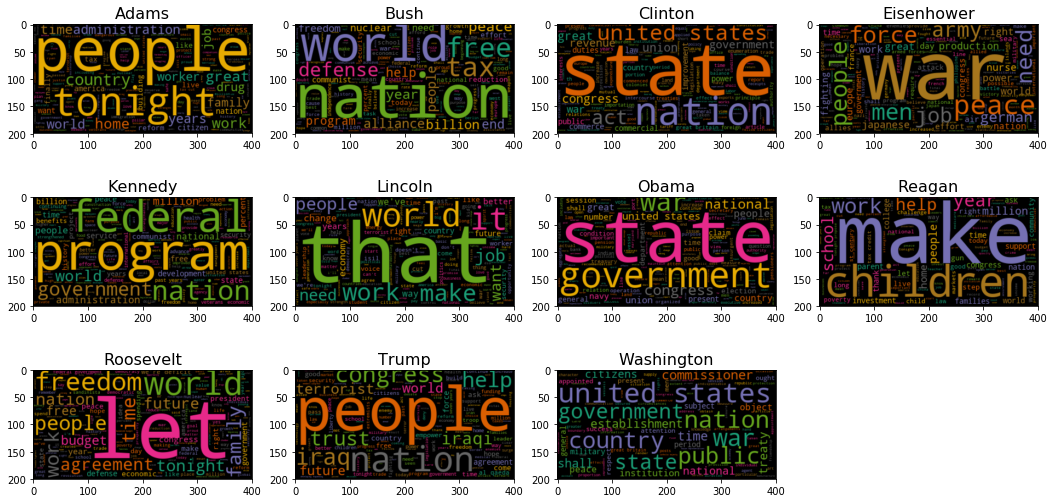

CPU times: user 7.05 s, sys: 909 ms, total: 7.96 s
Wall time: 7.87 s


In [153]:
# Generate a word cloud

%%time
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18, 9]

names = names

for index, pres in enumerate(data.columns):
  wc.generate(data_clean.speech[pres])
  
  plt.subplot(3, 4, index+1)
  plt.imshow(wc, interpolation='bilinear')
  plt.title(names[index], color='black', size=16)
plt.show()

### Second analysis

In [0]:
# How many different words does each president actually say ? 

unique_list = []
for pres in data.columns:
  unique = data[pres].to_numpy().nonzero()[0].size
  unique_list.append(unique)

In [155]:
unique_list

[1358, 1338, 1510, 1658, 1587, 1313, 1376, 1547, 1159, 1382, 807]

In [156]:
# Unique words.

data_words = pd.DataFrame(list(zip(unique_list, names)), columns=['unique_words', 'names'])
data_unique_sort = data_words.sort_values(by='unique_words', ascending=False)
data_unique_sort

,unique_words,names
3,1658,Eisenhower
4,1587,Kennedy
7,1547,Reagan
2,1510,Clinton
9,1382,Trump
6,1376,Obama
0,1358,Adams
1,1338,Bush
5,1313,Lincoln
8,1159,Roosevelt


In [0]:
# General summation of words

total_list = []
for pres in data.columns:
  total = sum(data[pres])
  total_list.append(total)

In [0]:
data_words['total_words'] = total_list
data_words['unique_words'] = unique_list
data_words['percent_unique_words'] = data_words['unique_words'] / data_words['total_words']

In [159]:
data_words

,unique_words,names,total_words,percent_unique_words
0,1358,Adams,2465,0.550913
1,1338,Bush,2528,0.529272
2,1510,Clinton,3003,0.502831
3,1658,Eisenhower,3680,0.450543
4,1587,Kennedy,3287,0.482811
5,1313,Lincoln,2503,0.524571
6,1376,Obama,2573,0.534784
7,1547,Reagan,3722,0.415637
8,1159,Roosevelt,2268,0.511023
9,1382,Trump,2802,0.493219


In [0]:
# Lets sort the data_words df by percent of unique words
data_words.index = data_df.index
data_words_by_unique_words = data_words.sort_values(by='percent_unique_words', ascending=False)


We see Washington has the heighest percent of unique words, lets nor forget, he's the one who said the **least** words in total, maybe its easier this way. Either way, we see its a different style of speech. We will see this more visually shortly

In [161]:
data_words_by_unique_words

,unique_words,names,total_words,percent_unique_words
Washington,807,Washington,1244,0.648714
Adams,1358,Adams,2465,0.550913
Obama,1376,Obama,2573,0.534784
Bush,1338,Bush,2528,0.529272
Lincoln,1313,Lincoln,2503,0.524571
Roosevelt,1159,Roosevelt,2268,0.511023
Clinton,1510,Clinton,3003,0.502831
Trump,1382,Trump,2802,0.493219
Kennedy,1587,Kennedy,3287,0.482811
Eisenhower,1658,Eisenhower,3680,0.450543


In [162]:
total_words_index = data_words.total_words.sort_values(ascending=False).index
uniques = data_words.percent_unique_words.sort_values(ascending=False)
uniques.index

Index(['Washington', 'Adams', 'Obama', 'Bush', 'Lincoln', 'Roosevelt',
       'Clinton', 'Trump', 'Kennedy', 'Eisenhower', 'Reagan'],
      dtype='object')

In [163]:
y_pos = data.columns
y_pos

Index(['Adams', 'Bush', 'Clinton', 'Eisenhower', 'Kennedy', 'Lincoln', 'Obama',
       'Reagan', 'Roosevelt', 'Trump', 'Washington'],
      dtype='object')

In [164]:
data_words.head()

,unique_words,names,total_words,percent_unique_words
Adams,1358,Adams,2465,0.550913
Bush,1338,Bush,2528,0.529272
Clinton,1510,Clinton,3003,0.502831
Eisenhower,1658,Eisenhower,3680,0.450543
Kennedy,1587,Kennedy,3287,0.482811


In [165]:
total_words = data_words.sort_values(by='total_words', ascending=False)
total_words.head()

,unique_words,names,total_words,percent_unique_words
Reagan,1547,Reagan,3722,0.415637
Eisenhower,1658,Eisenhower,3680,0.450543
Kennedy,1587,Kennedy,3287,0.482811
Clinton,1510,Clinton,3003,0.502831
Trump,1382,Trump,2802,0.493219


[]

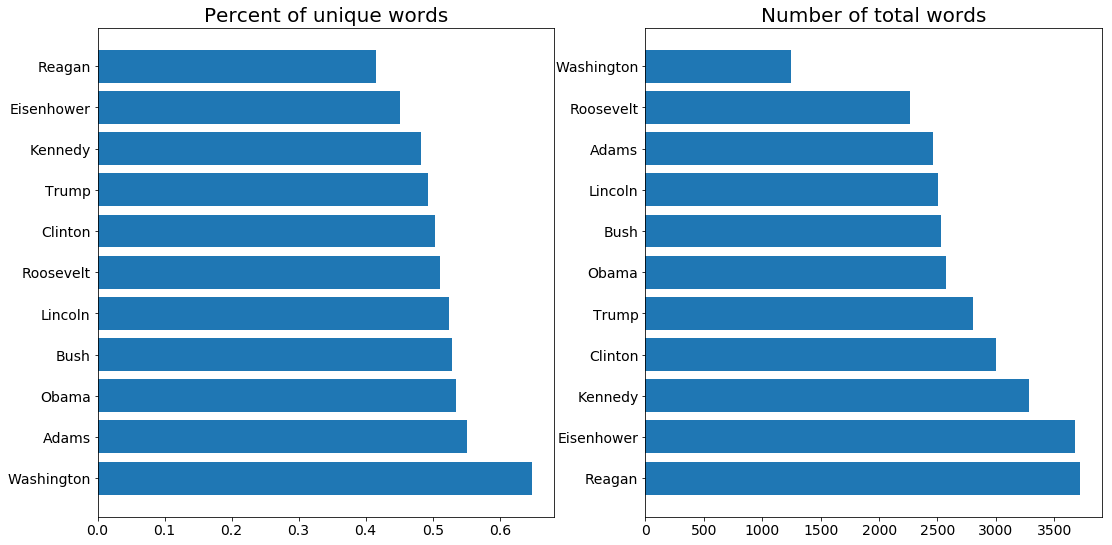

In [166]:
plt.rcParams['figure.figsize'] = [18, 9]

plt.subplot(1, 2, 1)
plt.barh(data_words_by_unique_words.index, data_words_by_unique_words.percent_unique_words, align='center')
plt.yticks(color='black', fontsize=14)
plt.xticks(color='black', fontsize=14)
plt.title('Percent of unique words', fontsize = 20, color='black')

plt.subplot(1, 2, 2)
plt.barh(total_words.index, total_words.total_words, align='center')
plt.yticks(color='black', fontsize=14)
plt.xticks(color='black', fontsize=14)
plt.title('Number of total words', fontsize = 20, color = 'black')

plt.plot()

Based on own intersts and some data exploration, I'm gueesing this speech would reference (to some extent at least) issues regarding country vs economy. Let us visualize that. *pat is short for patriotism. As you probably notice, this is completely influenced by how I created the charts. Different words would provide different analysis. Therefor it's a very good idea to think what do we need and what does the data provide. As this is here for educational purposes mostly, this is fine.

In [167]:
movey_vs_pat = data.transpose()[['tax', 'money', 'employment', 'wealth', 'rich', 'poor', 'economy', 'job', 'nation', 'budget', 'commerce', 'country', 'america', 'americans', 'loyalty']]
movey_vs_pat = pd.concat([movey_vs_pat.tax + movey_vs_pat.employment + movey_vs_pat.wealth + movey_vs_pat.rich + movey_vs_pat.budget +movey_vs_pat.commerce + movey_vs_pat.job + movey_vs_pat.economy + movey_vs_pat.poor, movey_vs_pat.country + movey_vs_pat.america + movey_vs_pat.nation + movey_vs_pat.loyalty], axis=1)
movey_vs_pat.columns = ['money', 'pat']
movey_vs_pat

,money,pat
Adams,23,52
Bush,36,22
Clinton,15,34
Eisenhower,23,19
Kennedy,22,26
Lincoln,35,44
Obama,3,16
Reagan,53,52
Roosevelt,30,45
Trump,19,60


(array([10., 20., 30., 40., 50., 60., 70.]),
 <a list of 7 Text yticklabel objects>)

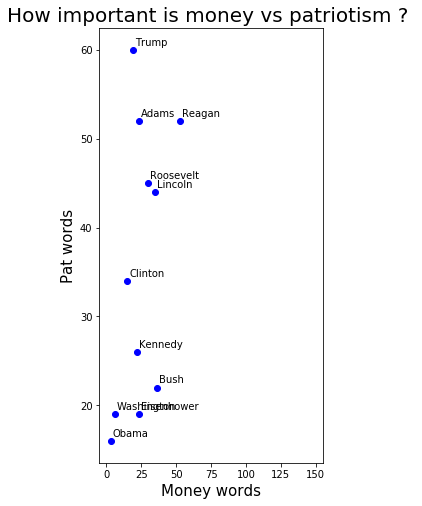

In [168]:
# Trump speaks a lot about patriorism, while Obama doesn't speak about those issues almost at all (at least not in the tested vocabulary)

plt.rcParams['figure.figsize'] = [4, 8]

for i, pres in enumerate(movey_vs_pat.index):
  x = movey_vs_pat.money.loc[pres]
  y = movey_vs_pat.pat.loc[pres]
  
  plt.scatter(x, y, color='blue')
  plt.text(x+1.5, y+0.5, names[i], fontsize=10)
  plt.xlim(-5, 155)
  
plt.title('How important is money vs patriotism ? ', fontsize=20, color='black')
plt.xlabel('Money words', fontsize=15, color='black')
plt.ylabel('Pat words', fontsize=15, color='black')

plt.xticks(color='black')
plt.yticks(color='black')

In [0]:
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [0]:
data_df['polarity'] = data_df['speech'].apply(pol)
data_df['subjectivity'] = data_df['speech'].apply(sub)

In [171]:
data_df['names'] = names
data_df.index = names
data_df.sort_values(by='subjectivity', ascending=False)

,speech,polarity,subjectivity,names
Adams,"Mr. Speaker, Mr. Vice President, Members of Co...",0.111893,0.480289,Adams
Bush,"Mr. Vice President, Mr. Speaker, Members of th...",0.124460,0.471798,Bush
Eisenhower,To the Congress:\n\nIn considering the State o...,0.143613,0.461968,Eisenhower
Obama,Fellow-Citizens of the Senate and House of Rep...,0.147257,0.438328,Obama
Trump,"Madam Speaker, Vice President Cheney, Members ...",0.129968,0.435376,Trump
Roosevelt,"Mr. Speaker, Mr. President, and distinguished ...",0.158511,0.430136,Roosevelt
Lincoln,"Mr. Speaker, Mr. Vice President, Members of Co...",0.111453,0.428411,Lincoln
Kennedy,To the Congress of the United States:\n\nOnce ...,0.127702,0.426252,Kennedy
Washington,Fellow-Citizens of the Senate and House of Rep...,0.147242,0.424615,Washington
Reagan,"Mr. Speaker, Mr. Vice President, Members of Co...",0.161257,0.421074,Reagan


In [172]:
for i, pres in enumerate(data_df.index):
  y = data_df.subjectivity.loc[pres]
  print(y)

0.48028885512329245
0.47179832703709157
0.408440939670742
0.4619678478974966
0.4262518666454662
0.4284110764907135
0.43832779378910364
0.4210737488160398
0.4301364649609203
0.43537627005590396
0.4246148762741682


Text(0, 0.5, '<--- Facts -------- Opinions --->')

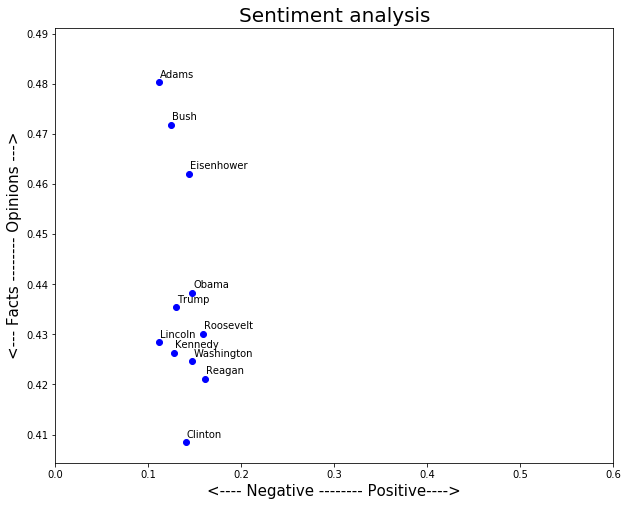

In [173]:
# For the second time, we see  an almost straight vector on the x axis - this is a sign of low variance in some way (neg/pos in this case)
# my guess is, reason being the context. A presidentual, state of the nation speech is far from being free everyday talk.

plt.rcParams['figure.figsize'] = [10, 8]

for index, pres in enumerate(data_df.index):
  x = data_df.polarity.loc[pres]
  y = data_df.subjectivity.loc[pres]
  
  plt.scatter(x, y, color='blue')
  plt.text(x + 0.001, y + 0.001, data_df['names'][index], fontsize=10)
  plt.xlim(0, .6)
  
plt.title('Sentiment analysis', fontsize = 20, color = 'black')
plt.xlabel('<---- Negative -------- Positive---->', fontsize = 15, color='black')
plt.ylabel('<--- Facts -------- Opinions --->', fontsize = 15, color='black')

In [0]:
import math

def split_text(text, n=10):
  length = len(text)
  size = math.floor(length / n)
  start = np.arange(0, length, size)
  
  split_list = []
  for piece in range(n):
    split_list.append(text[start[piece]:start[piece]+size])
  return split_list

In [189]:
list_pieces = []
for t in data_clean.speech:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces[0][0][:150]

'mr. speaker, mr. vice president, members of congress, the first lady of\nthe united states, and my fellow americans:\n\nless than 1 year has passed since'

In [0]:
polarity_speech = []
for lp in list_pieces:
  polarity_piece = []
  for word in lp:
    polarity_piece.append(TextBlob(word).sentiment.polarity)
  polarity_speech.append(polarity_piece)

In [177]:
data_df.head()

,speech,polarity,subjectivity,names
Adams,"Mr. Speaker, Mr. Vice President, Members of Co...",0.111893,0.480289,Adams
Bush,"Mr. Vice President, Mr. Speaker, Members of th...",0.124460,0.471798,Bush
Clinton,Fellow Citizens of the Senate and of the House...,0.140489,0.408441,Clinton
Eisenhower,To the Congress:\n\nIn considering the State o...,0.143613,0.461968,Eisenhower
Kennedy,To the Congress of the United States:\n\nOnce ...,0.127702,0.426252,Kennedy


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


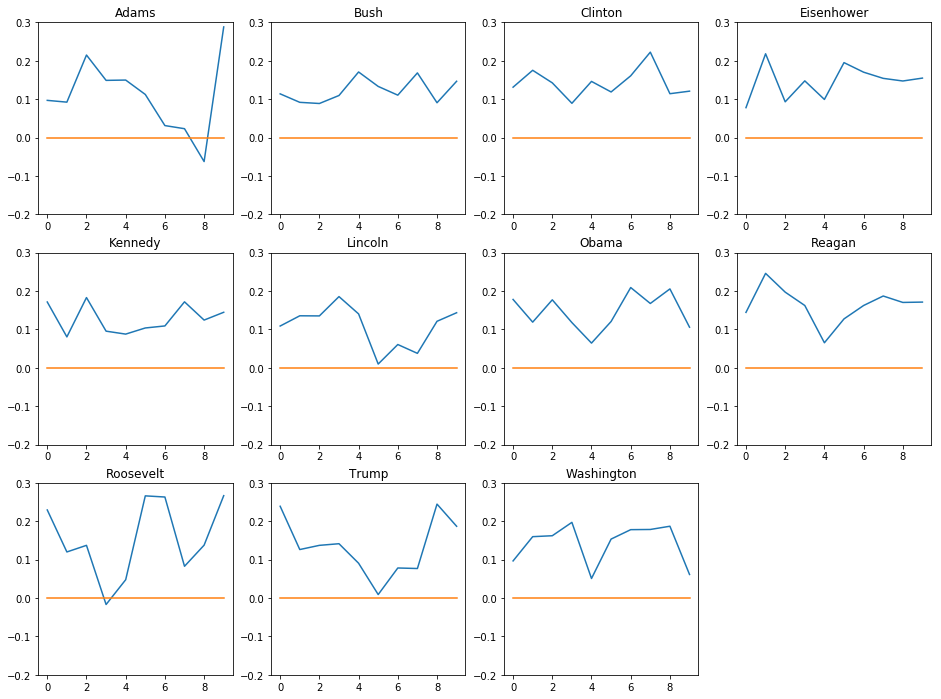

In [178]:
# How polarized is the speech ? using Textblob polarity is on scale of [-1,1]. -1 being very naegative, 1 being very positive. We see this is no memorial
# speech, its somewhat positive across speeches.

plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data_df.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_speech[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data_df['names'][index], color='black')
    plt.ylim(ymin=-.2, ymax=.3)

    
plt.show()

### Topic Modeling

In [179]:
data_df = pd.read_pickle('dtm_stop.pkl')
data_df.head()

,1st,2d,2nd,3d,3rd,4th,5th,6th,7th,aaron,abandon,abandonment,abide,ability,able,ablest,abnormal,aboard,abolished,abolishing,abolition,abortion,abound,abreast,abroad,absence,absolute,absolutely,absorbed,absorption,abstract,abundance,abundant,abuse,abusive,academic,academy,accelerate,accelerating,acceleration,...,wouldn,wound,wounded,wounds,wreaking,wreaks,wreck,wrest,wright,write,written,wrong,wrongs,wto,wyoming,yard,yards,yearly,yearn,yearning,years,yellow,yemen,yes,yesterday,yield,yielded,yielding,yields,york,yorktown,young,youth,youthful,yugoslavia,zealand,zealous,zimbabwe,zone,zones
Adams,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,10,0,0,0,0,0,0,0,0,1,1,4,1,0,0,0,0,0,0,0
Bush,0,0,0,0,0,0,1,0,0,0,1,1,0,4,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,11,0,0,0,0,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0
Clinton,5,1,1,1,2,1,2,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,2,0,0,0,0,0,0,1,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,10,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
Eisenhower,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,1,0,0,0,0,0,0,3,0,0,1,0,0,0,1,0
Kennedy,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2,0,0,0,1,0,0,0,0,1,5,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,26,0,0,0,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0


In [0]:
from gensim import matutils, models
import scipy.sparse

In [0]:
subjects = data_df.transpose()

In [0]:
sparse_counts = scipy.sparse.csr_matrix(subjects)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [0]:
cv = pickle.load(open('cv_stop.pkl', 'rb'))
# a dict with every word and the amount of times it appeared
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [184]:
# passes define the amount of times the model goes through all of the data
lda = models.LdaModel(corpus = corpus, id2word = id2word, num_topics = 2, passes = 10)
lda.print_topics()

[(0,
  '0.007*"people" + 0.005*"years" + 0.005*"world" + 0.005*"work" + 0.004*"congress" + 0.004*"make" + 0.004*"tonight" + 0.004*"help" + 0.003*"nation" + 0.003*"children"'),
 (1,
  '0.007*"war" + 0.006*"states" + 0.005*"united" + 0.004*"congress" + 0.004*"great" + 0.004*"peace" + 0.004*"government" + 0.004*"national" + 0.003*"people" + 0.003*"world"')]

In [185]:
# We can increase the number of topics, and the numbers of times the algorithm goes through the data

%%time
lda = models.LdaModel(corpus = corpus, id2word = id2word, num_topics = 3, passes = 40)

KeyboardInterrupt: ignored

In [0]:
lda.print_topics()